In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('ushape.csv')
df.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


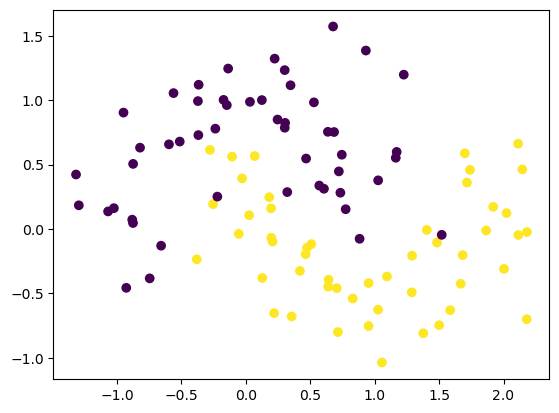

In [10]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
def plot_logistic_regression(x,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)
    
    clf = LogisticRegression()
    clf.fit(x_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=x.iloc[:,0].min()-1, stop=x.iloc[:,0].max()+1, step=0.01)
    b=np.arange(start=x.iloc[:,1].min()-1, stop=x.iloc[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(x.iloc[:,0],x.iloc[:,1], c=y.values)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))
    
    

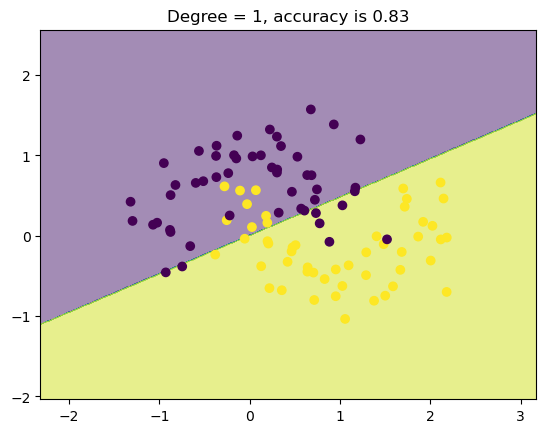

In [79]:
x = df[['x','y']]
y = df[['class']]
plot_logistic_regression(x,y)

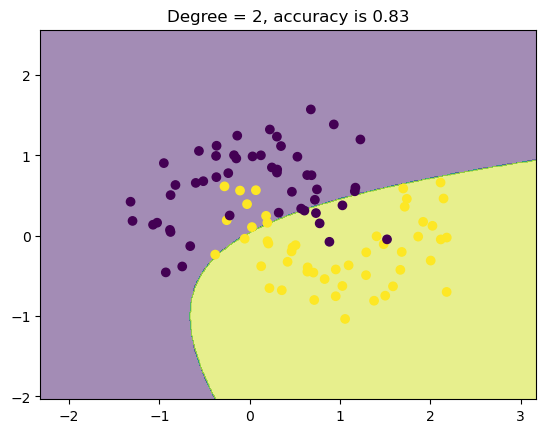

In [80]:
plot_logistic_regression(x,y,degree=2)

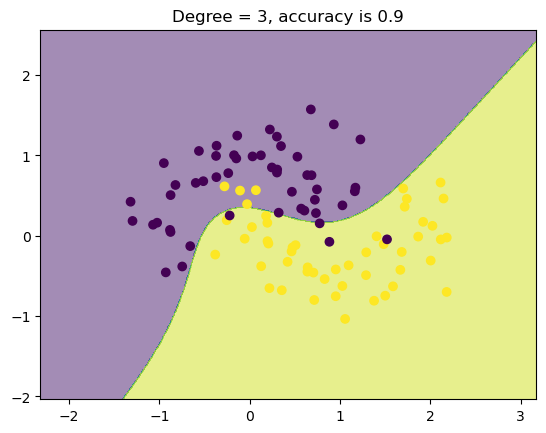

In [82]:
plot_logistic_regression(x,y,degree=3)

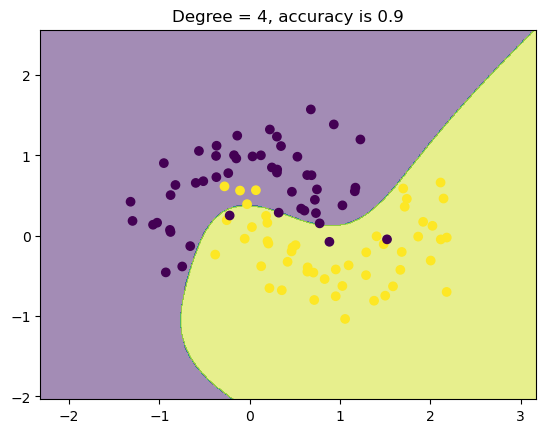

In [83]:
plot_logistic_regression(x,y,degree=4)

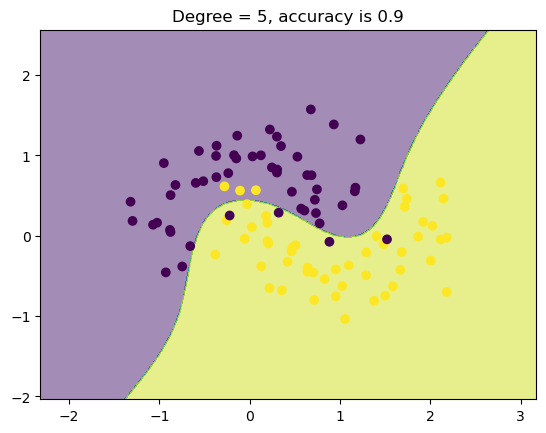

In [84]:
plot_logistic_regression(x,y,degree=5)

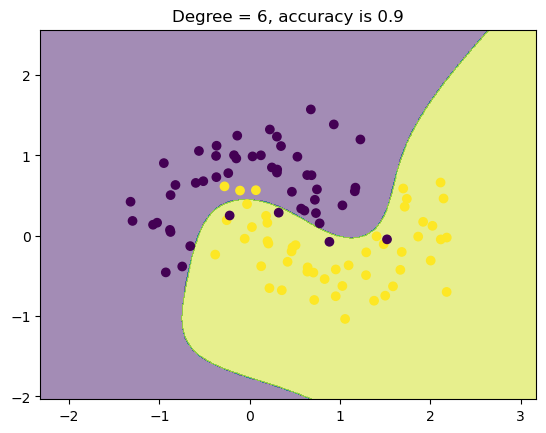

In [85]:
plot_logistic_regression(x,y,degree=6)

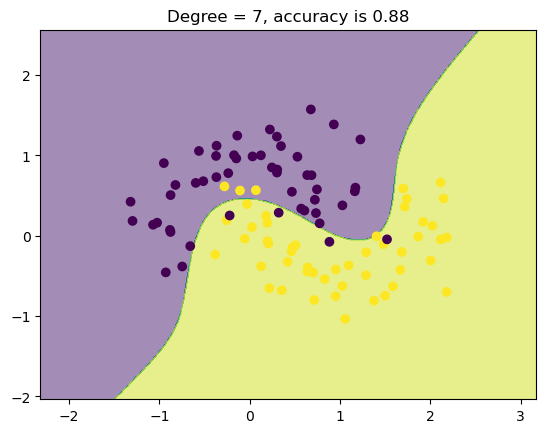

In [86]:
plot_logistic_regression(x,y,degree=7)

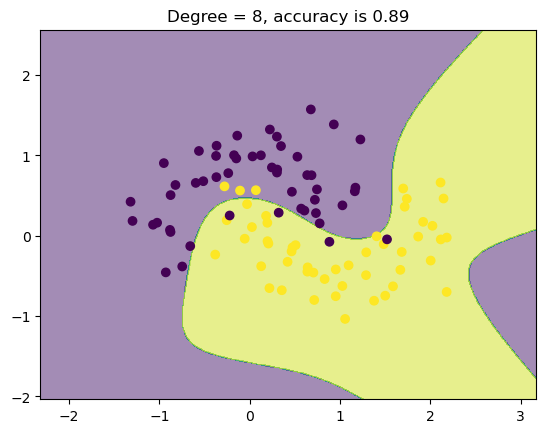

In [87]:
plot_logistic_regression(x,y,degree=8)

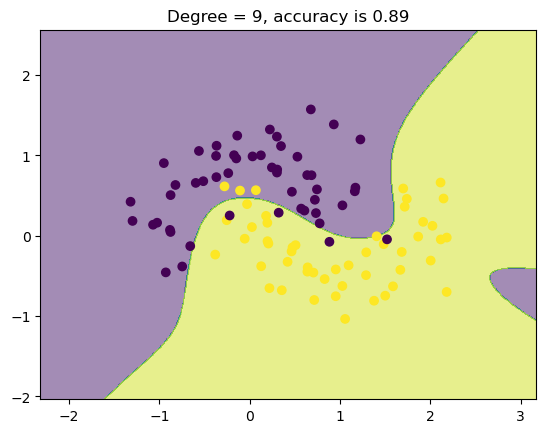

In [88]:
plot_logistic_regression(x,y,degree=9)